In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import *
from matplotlib.ticker import *
import math
import seaborn as sns
from itertools import cycle, islice
data = pd.DataFrame(pd.read_csv('covid_impact_on_airport_traffic.csv', header = 0))

# Data Pre-processing

In [2]:
#Group the Airport name and sort by their date
data = data.sort_values(['AirportName', 'Date'])

#Set index as date
data['Date'] = pd.to_datetime(data['Date'])
data.index = data.Date

In [3]:
#Create weekday column
data['Weekday'] = data['Date'].map(lambda x : x.weekday())
weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Weekday'] = [weekday_list[i] for i in data['Weekday']]

In [4]:
#Divided Centroid into longitude and latitude
def sep_long(point):
    long, _ = point[6:-1].split(" ") # 6 is the end of word point
    return float(long)

def sep_lat(point):
    _, lat = point[6:-1].split(" ")
    return float(lat)


data['Longitude'] = data['Centroid'].apply(lambda x : sep_long(x))
data['Latitude'] = data['Centroid'].apply(lambda x : sep_lat(x))

In [5]:
#Drop unnecessary stuff
data['AirportName']= data.AirportName.str.strip()
del data['AggregationMethod']
del data['Version']
del data['Centroid']

# Data Visualization

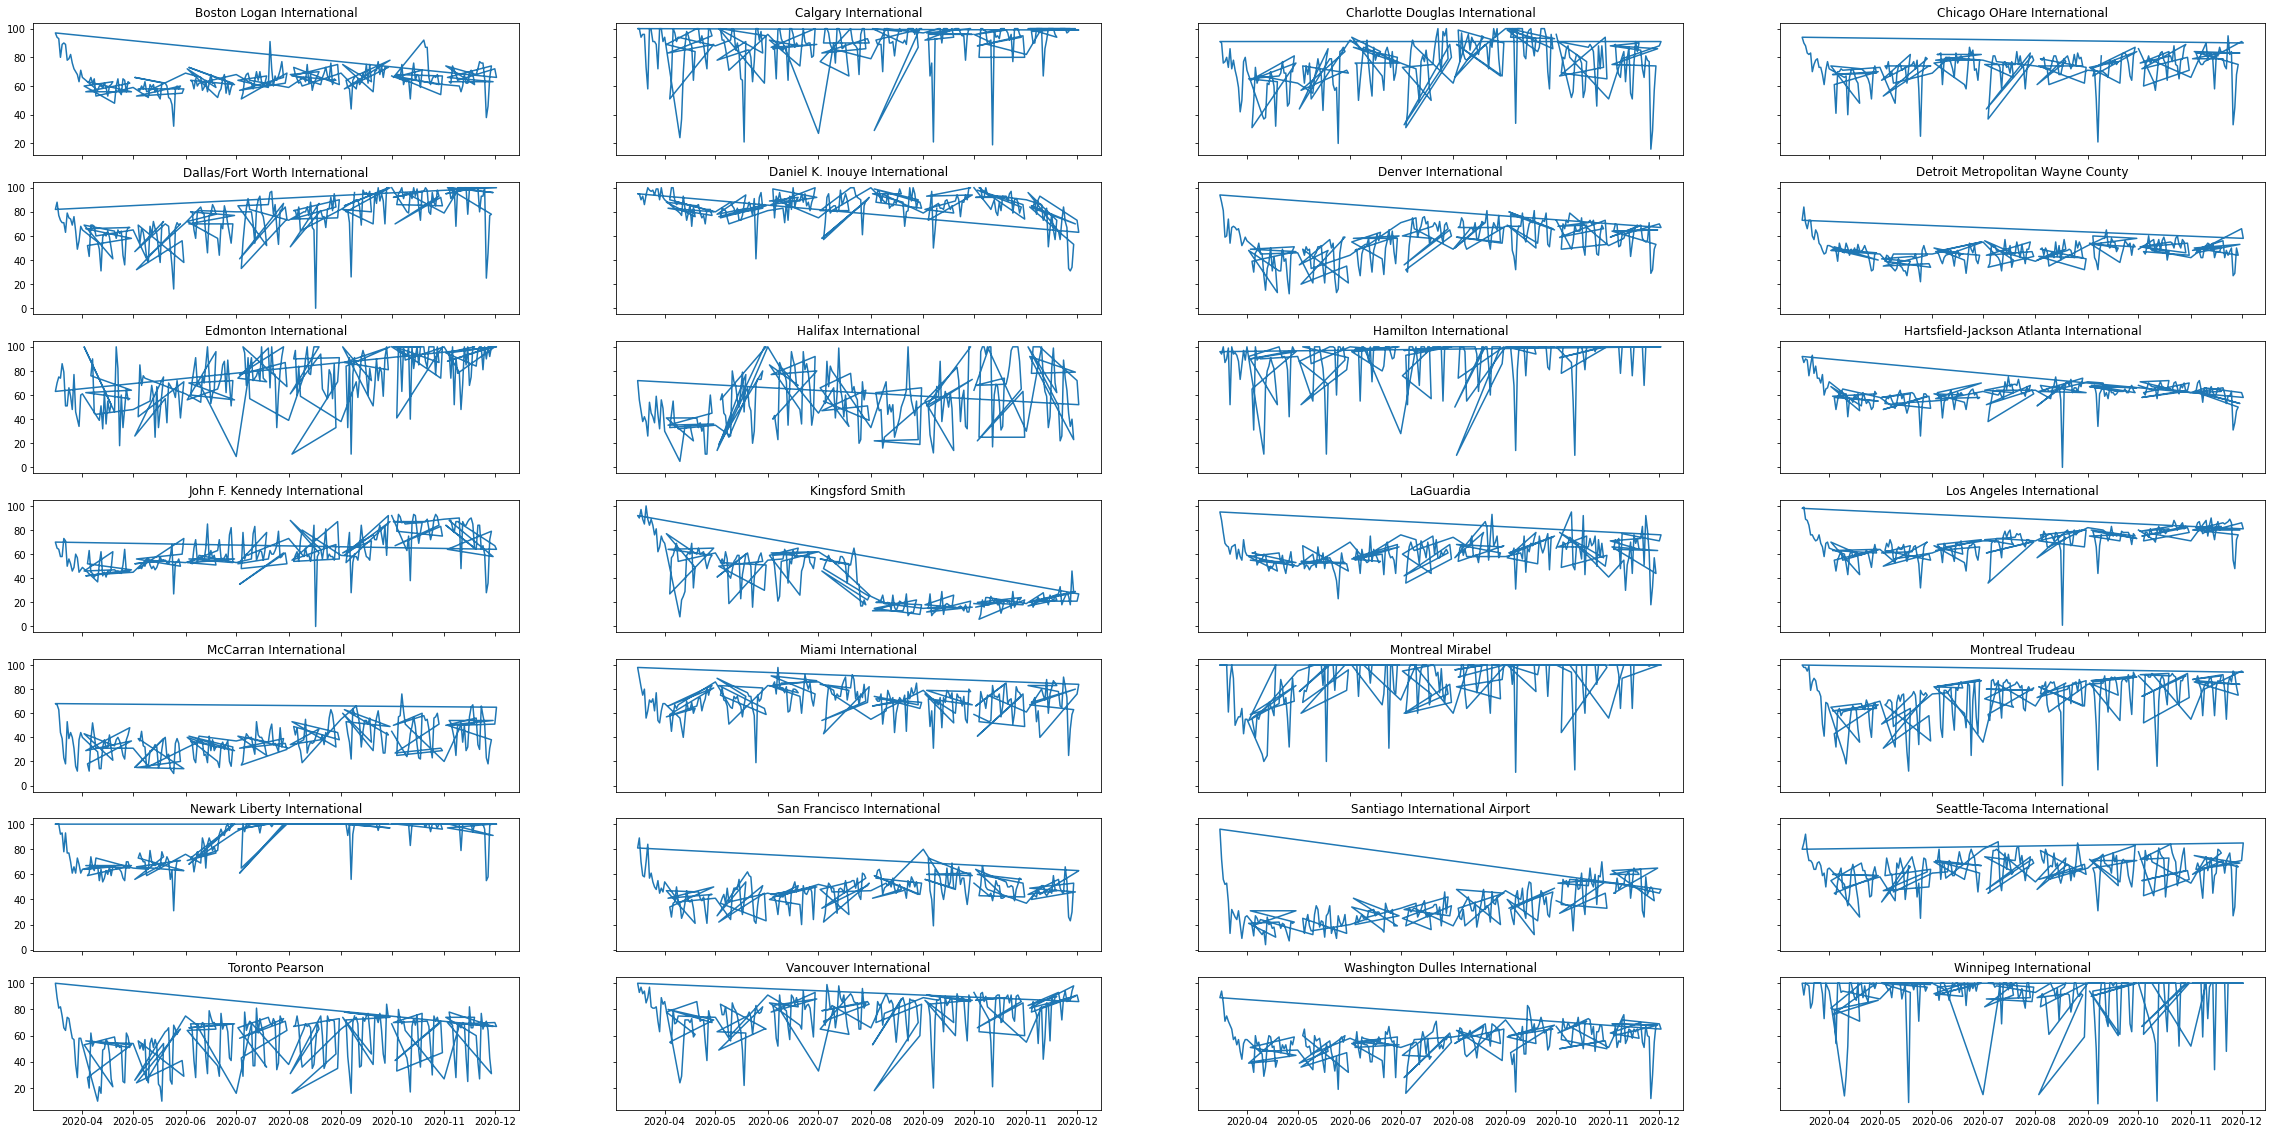

In [6]:
#Plot percent of baseline
unique_airport = data['AirportName'].unique()
row_num = math.ceil(len(unique_airport)/4)
col_num = 4
fig, ax = plt.subplots(row_num, col_num, figsize = (40,20),sharex='col', sharey='row')
    
i = 0
for x in range(0,row_num):
    for y in range(0,col_num):
        list = []
        pob = data[data['AirportName'] == unique_airport[i]]['PercentOfBaseline']
        date = data[data['AirportName'] == unique_airport[i]]['Date']
        for k in range(0, len(date), 30):
            list.append(date[k])
            

        ax[x,y].set_title(unique_airport[i])
        ax[x,y].plot(date,pob)

        if i+1 < len(unique_airport):
            i += 1
        

Text(0.5, 1.0, 'Record of each country')

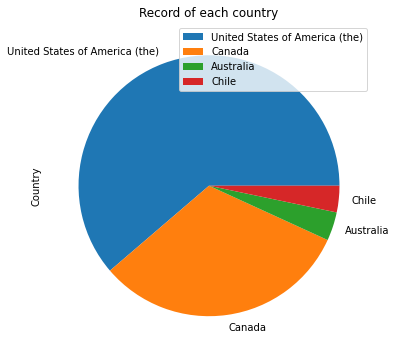

In [7]:
#Record of each country
country_record = pd.DataFrame(data['Country'].value_counts())
country_record.plot.pie(y = 'Country', figsize = (12,6))
plt.title("Record of each country")

Text(0.5, 1.0, 'Record of each airport')

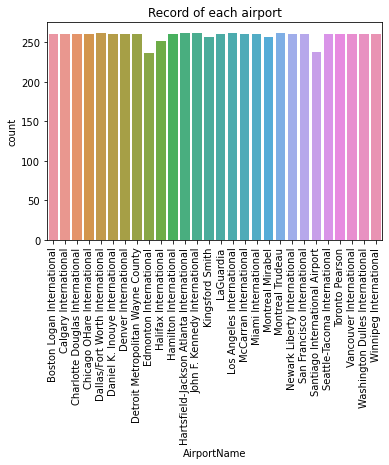

In [26]:
#Record of each airport
airport_record = pd.DataFrame(data['AirportName'].value_counts())
g = sns.countplot(data = data, x = 'AirportName')
#g.set_xticklabels(labels = g.get_xticklabels(), rotation = 90)
plt.xticks(rotation = 'vertical')
g.set_title('Record of each airport')

Text(0.5, 1.0, 'Record of each city')

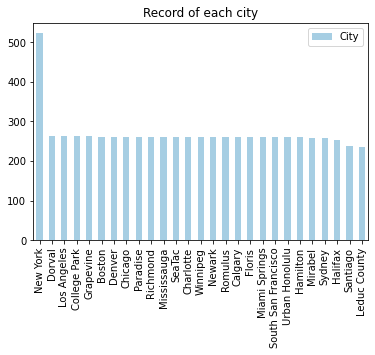

In [25]:
#Record of each city
record_city = pd.DataFrame(data['City'].value_counts())
record_city.plot.bar(colormap = 'Paired')
plt.title('Record of each city')


Text(0.5, 1.0, 'Record of each month')

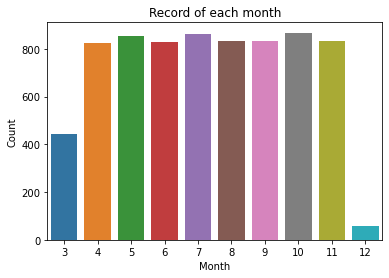

In [24]:
#Record of each month
record_month = pd.DataFrame(data['Date'].apply(lambda x : x.month).value_counts())
record_month = record_month.reset_index()
record_month = record_month.rename(columns = {'Date':'Count', 'index':'Month'})
g = sns.barplot(data = record_month.reset_index(), y = 'Count', x = 'Month')
g.set_title('Record of each month')